In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)


In [2]:
df1 = pd.read_csv('C:/Users/91905/Bengaluru_House_Data.csv')

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
#getting details on area type
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
#just assuming and dropping same columns to keep my model simple
df2 = df1.drop(['area_type','availability','society','balcony'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.shape

(13320, 5)

# Data Cleaning

In [8]:
#checking null values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
#dropping all the null values
df3 = df2.dropna()
df3.isnull().sum()


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3.shape

(13246, 5)

In [11]:
df3['size'].unique() #some funky business going on here.

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
#creating new column name BHK and applying lambda func on size to get only number of beds
df3['bhk'] = df3['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\91905\AppData\Local\Temp/ipykernel_13812/525090903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x:int(x.split(' ')[0]))


In [13]:
df3.head() #this looks good

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
#applying unique on bhk columns
df3['bhk'].unique() # wow 43 bhk, this is fishy need to fix it

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df3[df3['bhk']>20] # total sqft is 8000 and 2400 how can 27 and 43 room is possible

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
df3.total_sqft.unique() #range is given nstead of single number in total sqft feature

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
# checking if value in sqft column is float or not by fucn
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

    
    
            
    

In [18]:
# (~) negation operator
df3[~df3['total_sqft'].apply(is_float)].head(10) # range is given in many vaalues and miss typing is also there

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
#wrtitng a function to take avg of range 
def convert_sqft_num(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try: 
        return float(x)
    
    except:
        return None
    

In [20]:
convert_sqft_num('1200')

1200.0

In [23]:
#creating new df and converting sqft values to num
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_num)
df4 #changes done

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


# Feature Engineering

In [27]:
# making new df and adding new column converting prcie to per sqr feet
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head(10) # got new column with price per sqr feet
 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [34]:
#checking location
len(df5.location.value_counts()) # location is categorical feature if we do OHE it will create around 1300 new column,
#which is so many its called 'dimensionality curse'


1304

In [41]:
df5['location'] = df5['location'].apply(lambda x:x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [44]:
#checking how many locations have less than 10 value so we can create another name 'other' for them
len(location_stats[location_stats<=10])

1052

In [52]:
#creating a vatible to find out all the values with less than 10
location_less_10 =location_stats[location_stats<=10]
location_less_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [53]:
df5.location = df5.location.apply(lambda x: 'others' if x in location_less_10 else x)
len(df5.location.unique()) #from 1304 to 242 is awesome.

242

In [55]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,others,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# outlier detection and removal

In [68]:
# can check total size according to per bhk. need domain knowledge here
df5[(df5.total_sqft/df5.bhk<300)] # as we can see here 8 bhk in 600 sqft ?? not possible 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,others,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,others,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [64]:
df5.shape

(13246, 7)

In [69]:
#creating new df
df6 = df5[~(df5.total_sqft/df5.bhk<300)] #removing all the unusual datasets


In [70]:
df6.shape 

(12502, 7)

In [71]:
# now lets check price per sqrft column
df6.price_per_sqft.describe() # see below, 267 per sqft in Bengaluru and also check max

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [85]:
df6.shape

(12502, 7)

In [89]:
# removing all the outliers with 1std rule 
import numpy as np
def no_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = no_outlier(df6)
df7.shape
        
        


    
    

(10241, 7)

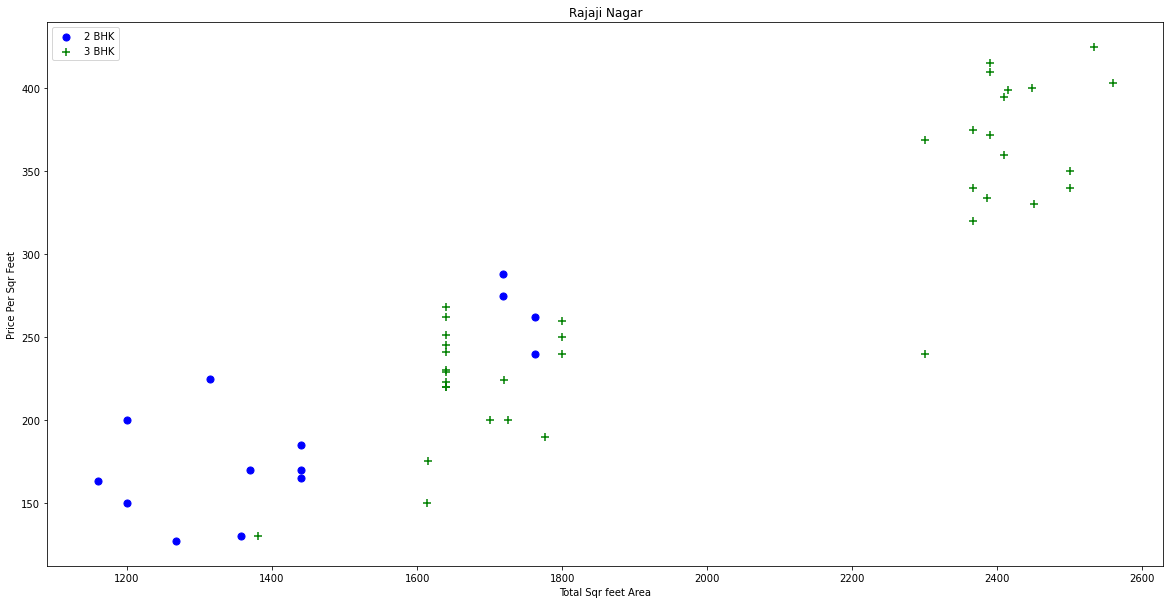

In [100]:
# check out price difference between 2bhk and 3bhk in same location
def scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='b',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker= '+',color='g',label='3 BHK',s=50)
    plt.xlabel('Total Sqr feet Area')
    plt.ylabel('Price Per Sqr Feet')
    plt.title(location)
    plt.legend()
scatter_chart(df7,'Rajaji Nagar') # as we can see 2BHK having more price than 3 bhk in same area
#scatter_chart(df7,'Hebbal') #in hebbal aslo  

In [96]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [98]:
def remove_bhk_outliers(df):
    exclude_indices =np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={'mean':np.mean(bhk_df.price_per_sqft),
                           'std':np.std(bhk_df.price_per_sqft),
                           'count':bhk_df.shape[0]}
            for bhk,bhk_df in location_df.groupby('bhk'):
                stats = bhk_stats.get(bhk-1)
                if stats and stats['count']>5:
                    exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8=remove_bhk_outliers(df7) # all the outlier in bhk columns removed
df8.shape
                    
                    
                
                
    
    

(7329, 7)

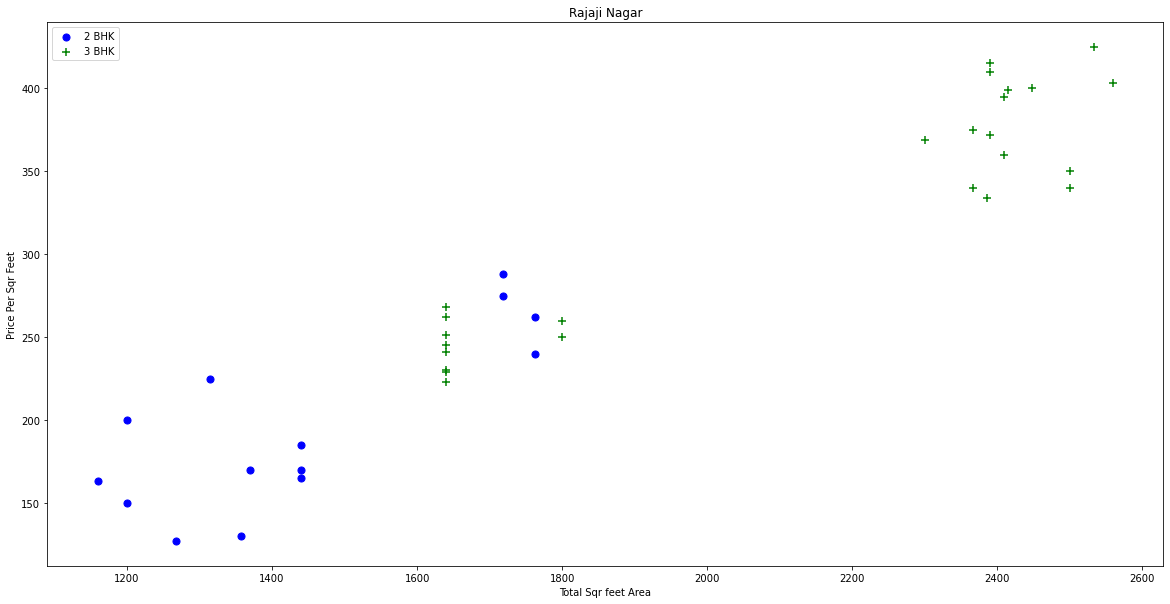

In [101]:
scatter_chart(df8,'Rajaji Nagar') # now we can compare both scatter plots to see that outliers removed

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

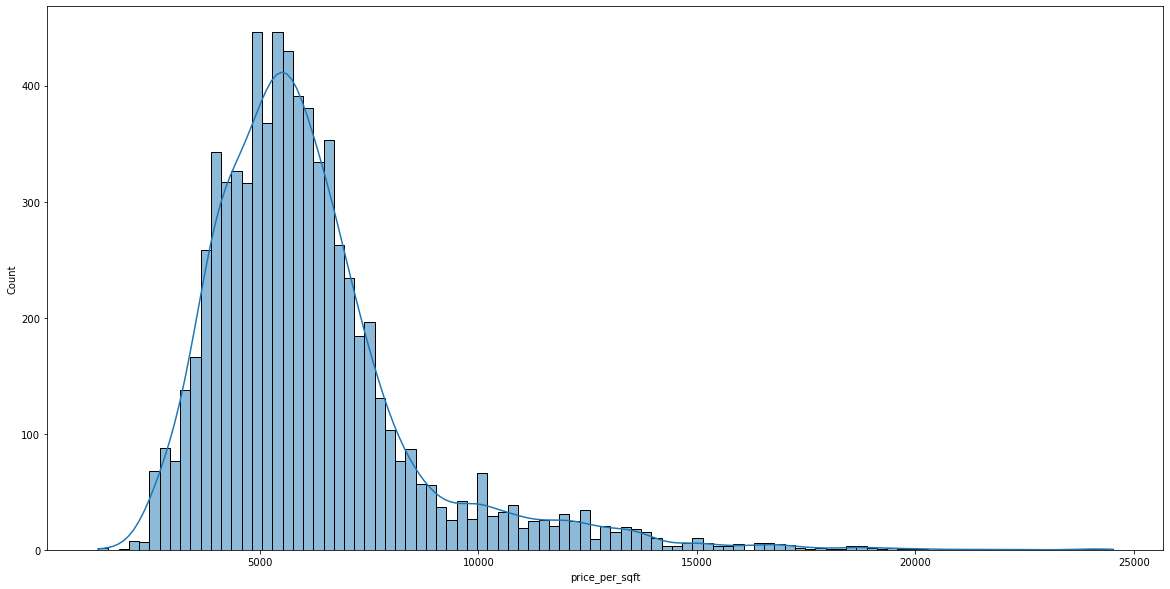

In [103]:
sns.histplot(data=df8.price_per_sqft,kde=True)

In [104]:
# now lets check baths
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [105]:
df8[(df8.bath>10)] #outliers spotted

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


<AxesSubplot:xlabel='bath', ylabel='Count'>

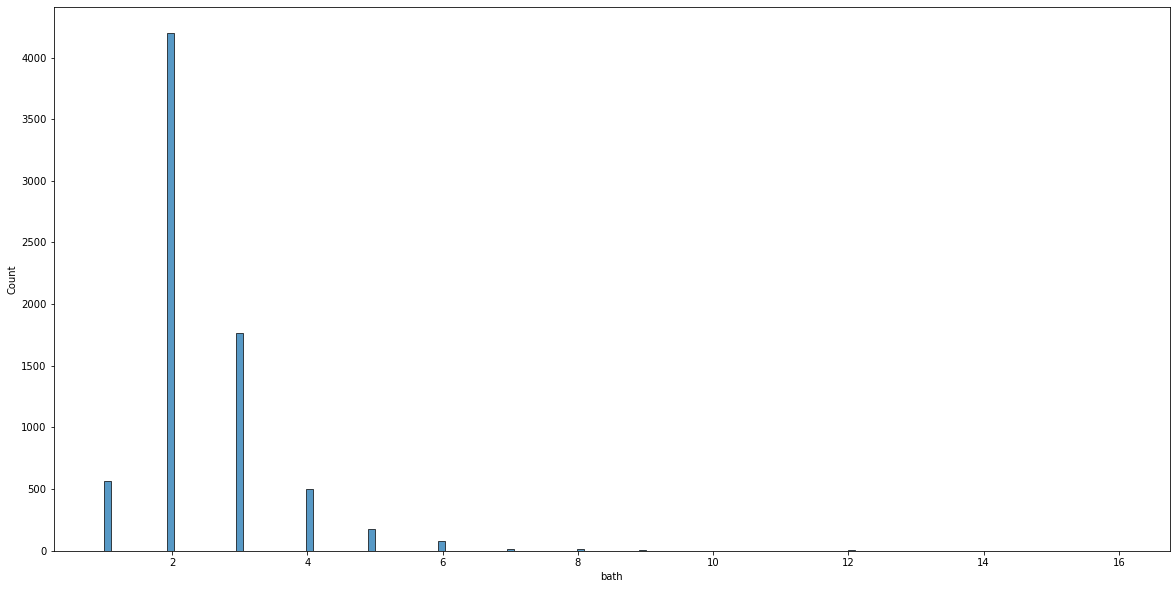

In [110]:
sns.histplot(df8.bath)

In [112]:
# lets check it according to bhk
df8[(df8.bath>df8.bhk+2)] # 3bhk having 6 bath not really normal

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [114]:
#lets remove them
df9 = df8[(df8.bath<df8.bhk+2)]
df9.shape #removed

(7251, 7)

In [115]:
#dropping size and price_per_sqft column
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [116]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 10240
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7251 non-null   object 
 1   total_sqft  7251 non-null   float64
 2   bath        7251 non-null   float64
 3   price       7251 non-null   float64
 4   bhk         7251 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 339.9+ KB


In [120]:
len(df10.location.unique())

242

In [124]:
#applying dummies to convert location column into numerical
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
df11 = pd.concat([df10,dummies.drop('others',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
#dropping location column now
df12 = df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building a model

In [150]:
# dropping independend variaables
X = df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# storing dependent variable in y
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [129]:
# # split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=10)

In [151]:
# fitting a linear model
#Training a model
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874324

In [152]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [137]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [161]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [168]:
# writting a function to predict price
# def predict_price(location,sqft,bath,bhk):
#     loc_index = np.where(X.columns==location)[0][0]
    
#     x = np.zeros(len(X.columns))
#     x[0] = sqft
#     x[1] = bath
#     x[2] = bhk
#     if loc_index >=0:
#         x[loc_index] = 1
        
#     return lr_clf.predict([x])[0]
    
    


In [172]:
Coef_df=pd.DataFrame(zip(X_train.columns,lr_clf.coef_))
Coef_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,234,235,236,237,238,239,240,241,242,243
0,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,0.079415,5.079025,-1.772878,120.102684,1.609751,-53.163219,100.744709,-70.981493,-39.215954,-19.017285,...,-19.592202,-81.654367,-36.528451,-36.991821,-28.530907,-30.781752,-35.288123,-24.877539,-53.622696,-12.598085


In [175]:
# Get all the model performace parameters
# we can get train error
from sklearn import metrics
y_train_pred = lr_clf.predict(X_train)

mean_l1_error_train=metrics.mean_absolute_error(y_train,y_train_pred)
mean_l2_error_train=metrics.mean_squared_error(y_train,y_train_pred)
Rootmean_l2_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

train_acc = lr_clf.score(X_train,y_train)

print("mean_l1_error_train is {} mean_l2_error_train is {} Rootmean_l2_error_train is {} and accuracy is {}".format(mean_l1_error_train,mean_l2_error_train,Rootmean_l2_error_train,train_acc))


mean_l1_error_train is 17.32874505277608 mean_l2_error_train is 1215.5304973021114 Rootmean_l2_error_train is 34.864458941766344 and accuracy is 0.8541850010771193


In [179]:
# model parameters and annova
import statsmodels.api as sm
x_train_final=sm.add_constant(X_train)
model_object=sm.OLS(y_train,x_train_final)
model=model_object.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     133.4
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        20:15:38   Log-Likelihood:                -28828.
No. Observations:                5800   AIC:                         5.815e+04
Df Residuals:                    5555   BIC:                         5.978e+04
Df Model:                         244                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [180]:
DF_y_train_pred=pd.DataFrame(y_train_pred,columns=['price_predict'])
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
DF_y_train_pred.reset_index(drop=True, inplace=True)

Train_with_pred=pd.concat([X_train,y_train,DF_y_train_pred], axis=1)
Train_with_pred

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,price,price_predict
0,1564.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,105.0,102.246041
1,3200.0,4.0,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,224.0,234.684505
2,2444.0,4.0,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,145.0,174.646482
3,1107.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,44.0,44.803369
4,1400.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,78.0,82.873693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,1139.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,60.0,52.800531
5796,1495.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,110.0,92.197142
5797,950.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,40.0,-5.208046
5798,6000.0,8.0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,215.0,447.670463


In [182]:
y_test_pred=lr_clf.predict(X_test)
DF_y_test_pred=pd.DataFrame(y_test_pred,columns=['price_predict'])
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
DF_y_test_pred.reset_index(drop=True, inplace=True)

Test_with_pred=pd.concat([X_test,y_test,DF_y_test_pred], axis=1)
Test_with_pred

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,price,price_predict
0,1432.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,68.00,70.478963
1,1032.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,42.00,33.093124
2,929.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,46.00,36.004331
3,1690.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,116.00,106.109483
4,1683.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,109.00,109.271556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1725.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,85.00,102.583221
1447,1184.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,55.00,68.851000
1448,1090.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,31.48,29.458053
1449,1115.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,65.12,58.433063
